In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

\begin{equation*}
P(E)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}

\begin{equation*}
P(blowout)   = 0.01
\end{equation*}

<br/>

\begin{equation*}
P(patch)   = 0.4
\end{equation*}

price of replacing a tire = ~100 - 250

In [2]:
(1000*20.0)/3

6666.666666666667

In [3]:
7*12*5*1000

420000

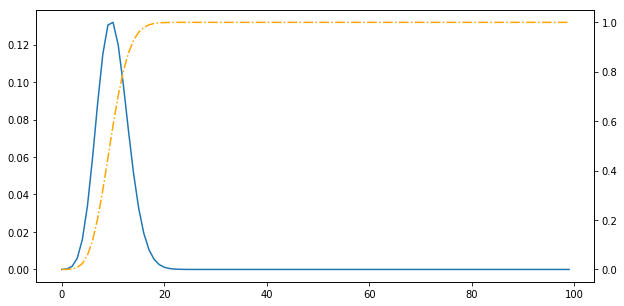

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(st.binom.pmf(k=np.arange(100), n=100, p=0.1, loc=0), linestyle='-')

ax2 = ax1.twinx()
plt.plot(st.binom.cdf(k=np.arange(100), n=100, p=0.1, loc=0), color='orange', linestyle='-.')

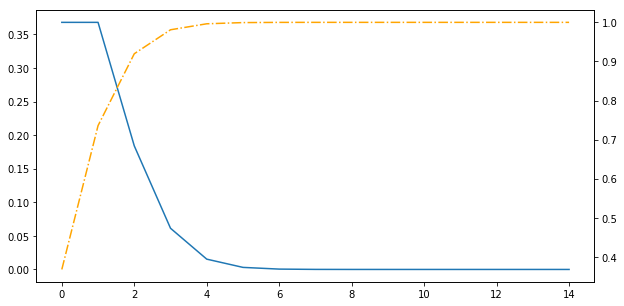

In [6]:
lam = 1
n = np.arange(0, 15)
y = st.poisson.pmf(n, lam)

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(y)

ax2 = ax1.twinx()
plt.plot(st.poisson.cdf(n, lam), color='orange', linestyle='-.')

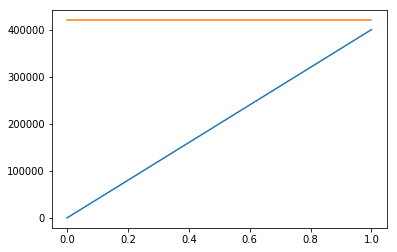

In [7]:
rate = np.arange(0,1.01, 0.01)

plt.plot(rate, rate*200*1000*2)
plt.plot(rate, [420000 for i in range(len(rate))])

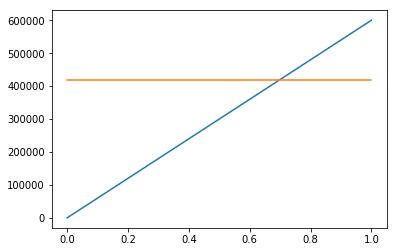

In [8]:
rate = np.arange(0,1.01, 0.01)

plt.plot(rate, rate*200*1000*3)
plt.plot(rate, [420000 for i in range(len(rate))])

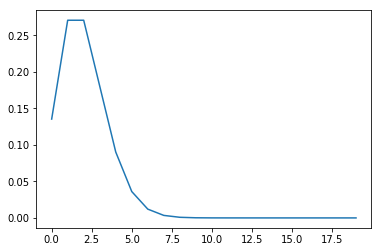

In [9]:
plt.plot(st.poisson.pmf(range(20), 2))

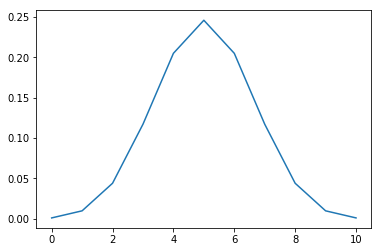

In [20]:
plt.plot(st.binom.pmf(k=np.arange(11), n=10, p=0.5, loc=0))

In [25]:
def binomial_probs(k, n, p, condition='<='):
    if condition == '<=':
        return sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k+1)])
    elif condition == '<':
        return sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k+1)])
    elif condition == '>=':
        return 1 - sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k)])
    elif condition == '>':
        return 1 - sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k +1)])
    elif condition == '=':
        return st.binom.pmf(k=k, n=n, p=p)

In [48]:
b2p0 = binomial_probs(k=2, n=5, p=0.05, condition='>=')
b1p5 = binomial_probs(k=1, n=5, p=0.05, condition='=')*binomial_probs(k=5, n=5, p=0.3, condition='>=')
b0p12 = binomial_probs(k=12, n=5, p=0.3, condition='>=')

In [53]:
"There is a {}% chance of you spending more on tire repairs than on the warranty".format(np.round((b2p0 + b1p5 + b0p12)*100, 2))

'There is a 2.31% chance of you spending more on tire repairs than on the warranty'

2.220446049250313e-16

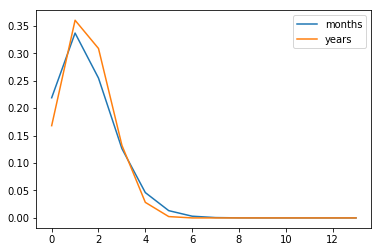

In [44]:
plt.plot(st.binom.pmf(k=range(14), n=60, p=0.025), label='months')
plt.plot(st.binom.pmf(k=range(14), n=5, p=0.3), label='years')
plt.legend()